# Detección de elementos en imágenes

La detección de elementos consiste en la identificación de características de una imagen que responden a un patrón.

In [1]:
import cv2
import numpy as np
import cuia

## Detección de esquinas

Un esquina es un punto de la imagen en el que hay una transición abrupta en todas direcciones alrededor de dicho punto. Emplearemos la [detección de squinas de Harris](https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html) que combina la detección de vértices y aristas.

[**cornerHarris**(imagen. bloque , ksize, k)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)
* imagen en escala de grises en la que se buscarán esquinas
* bloque (tamaño de la vecindad de píxeles que se compararán)
* ksize (aperturas del operador de Sobel empleadop en el proceso)
* k (parámetro de la fórmula de detección de Harris)

El resultado es una imagen en la que cada píxel indica la intensidad con que se ha detectado una esquina.

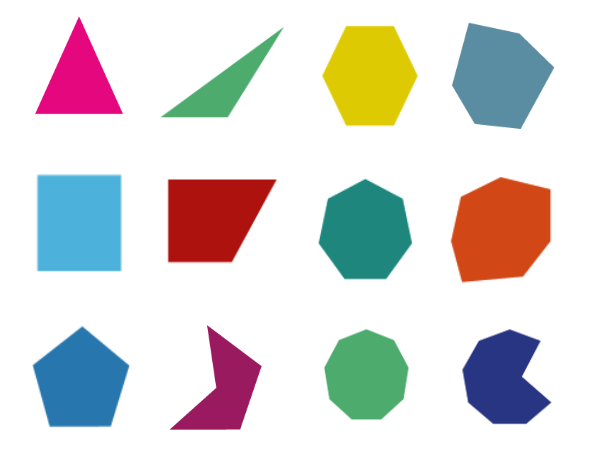

In [2]:
poligonos = cv2.imread("media/poligonos.png")
cuia.plot(poligonos)

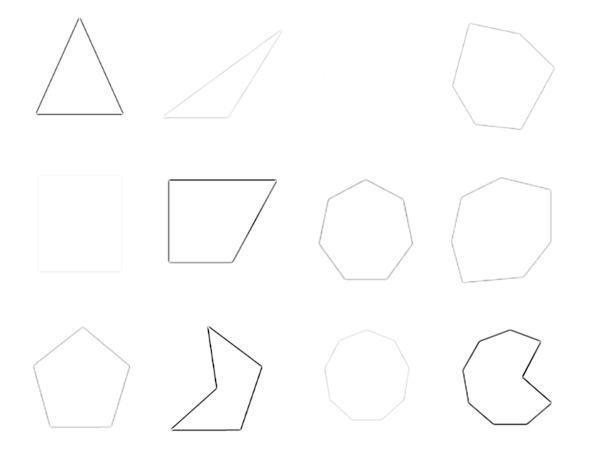

In [3]:
gris = cv2.cvtColor(poligonos, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gris, 2, 3, 0.4)
cuia.plot(res)

Los parámetros son poco intuitivos y el resultado es necesario procesarlo en busca de los píxeles destacados.

La función [cv2.goodFeaturesToTrack](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541) implementa el algoritmo de Shi-Tomasi (una modificación al algoritmo de Harris) ofreciendo una lista de los mejores vértices detectados.

[**goodFeaturesToTrack**(imagen, maxCorners, qualityLevel, minDistance)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)
* imagen en escala de grises donde se buscarán las esquinas
* maxCorners (número máximo de esquinas que se buscarán
* qualityLevel (umbral mínimo de calidad, relativo al mejor candidato)
* minDistance (distancia mínima entre los píxeles devueltos)

El valor devuelto es una lista con las coordenadas (como números reales) de las mejores esquinas detectadas.

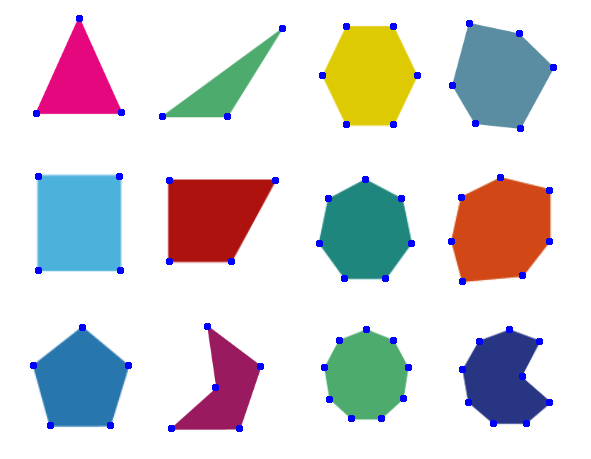

In [4]:
corners = cv2.goodFeaturesToTrack(gris, maxCorners=100, qualityLevel=0.01, minDistance=25)
imagen=poligonos.copy()
for c in corners:
    cv2.drawMarker(imagen, c[0].astype(int), (255,0,0), cv2.MARKER_STAR, 5, 2)
cuia.plot(imagen)

## Detección de círculos

La detección de círculos se realiza mediante una modificación de la [transformada de Hough](https://es.wikipedia.org/wiki/Transformada_de_Hough)

[**HoughCircles**( image, method, dp, minDist, param1, param2, minRadius, maxRadius)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)
* image (imagen en escala de grises)
* method (método a emplear, siendo las opciones cv2.HOUGH_GRADIENT y CV2.HOUGH_GRADIENT_ALT)
* dp (parámetro relativo a la resolución, su valor depende del método)
* minDist (distancia mínima entre los centros de  los círculos detectados para evitar detección múltiple del mismo círculo)
* param1 (parámetro que depende del método, por defecto 100)
* param2 (parámetro que depende del método, por defecto 100)
* minRadius (radio mínimo de los círculos detectados, por defecto 0)
* maxRadius (radio máximo de los círculos detectados, por defecto 0 --sin límite--)

El valor devuelto es una lista en la que para cada círculo detectado se indican las coordenadas del centro y el radio como números reales.

In [5]:
snooker = cv2.imread("media/snooker.jpg")
gris = cv2.cvtColor(snooker, cv2.COLOR_BGR2GRAY)

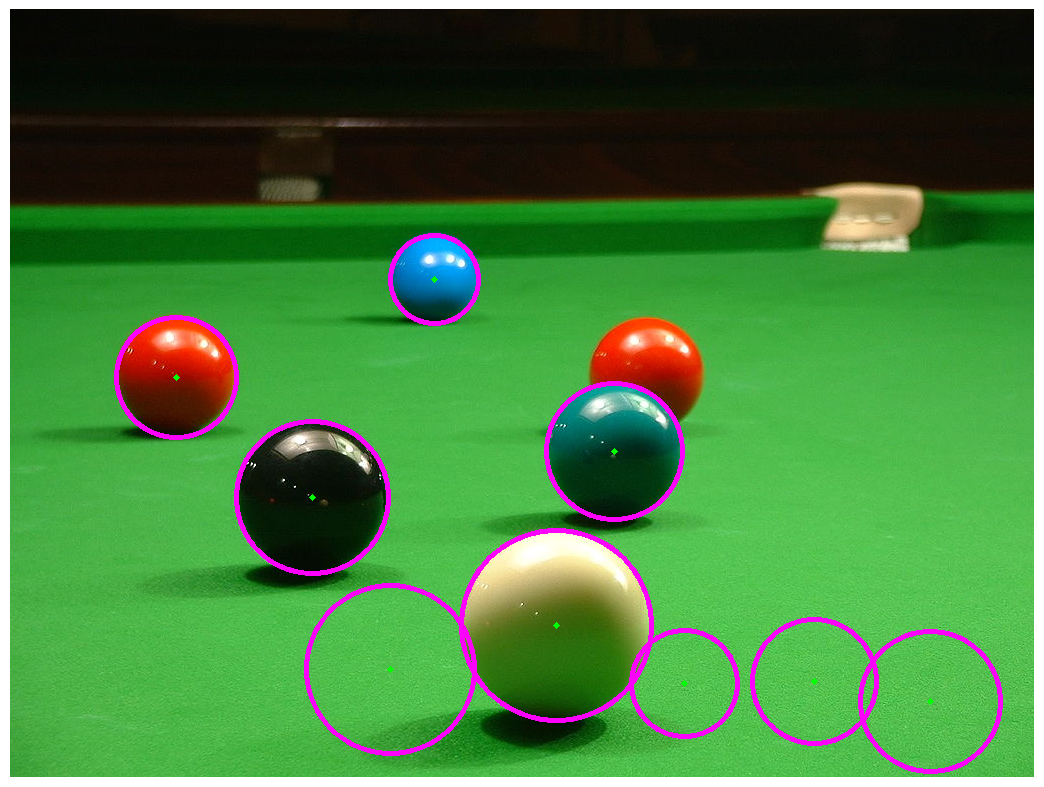

In [6]:
imagen = snooker.copy()
circulos = cv2.HoughCircles(gris, 
                           method = cv2.HOUGH_GRADIENT, 
                           dp = 1, 
                           minDist = 100,
                           param1=100, param2=30,
                           minRadius=30, maxRadius=100)
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for i in circulos[0, :]:
        centro = (i[0], i[1])
        cv2.circle(imagen, centro, 1, (0,255,0), 3)
        radio = i[2]
        cv2.circle(imagen, centro, radio, (255, 0, 255), 3)
        
cuia.plot(imagen)

Podemos comprobar que es necesario ajustar los parámetros adecuadamente y que podemos obtener falsos positivos así como la no detección de algunos elementos. Esto podría solucionarse con algún tipo de preprocesado de la imagen.

## Detección de lineas

Para la detección de lineas podemos usar dos variantes del algoritmo de Hough:

[**HoughLines**(image, rho, theta, threshold, srn, stn, min_theta, max_theta)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)
* image (imagen binaria b/n en la que se buscarán las lineas)
* rho (parámetro de distancia del algoritmo)
* theta (parámetro de ángulo del algoritmo)
* threshold (umbral que deberán superar las líneas candidatas)
* srn (opcional - parámetro del algoritmo)
* stn (opcional - parámetro del algoritmo)
* min_theta (opcional - ángulo mínimo)
* max_theta (opcional - ángulo máximo)

[**HoughLinesP**(image, rho, theta, threshold, minLineLength, maxLineGap)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb)
* image (imagen binaria b/n en la que se buscarán las lineas)
* rho (parámetro de distancia del algoritmo)
* theta (parámetro de ángulo del algoritmo)
* threshold (umbral que deberán superar las líneas candidatas)
* minLineLength (opcional - longitud mínima de las lineas detectadas)
* maxLineGap (opcional - distancia máxima entre dos lineas colineales para que sean percibidas como una misma linea)

Al trabajar el algoritmo con imágenes en blanco y negro, lo habitual es aplicarlo a una imagen que haya sido procesada mediante el algoritmo de detección de bordes [Canny](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga2a671611e104c093843d7b7fc46d24af)

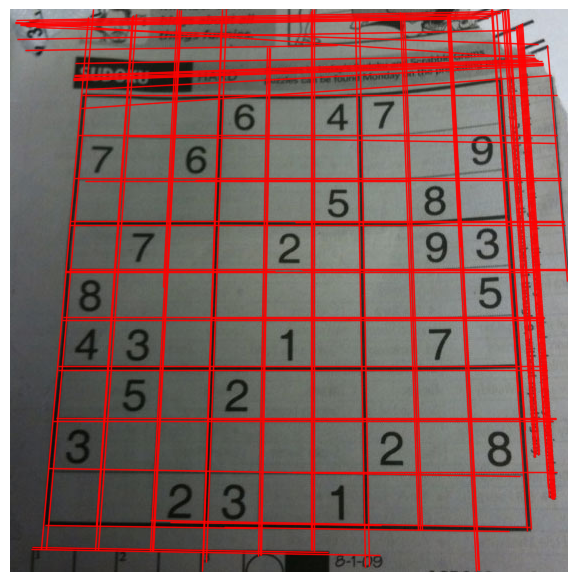

In [7]:
sudoku = cv2.imread("media/sudoku.png")
bn = cv2.Canny(sudoku, 30 , 100)
lineas = cv2.HoughLinesP(bn, rho=1, theta=np.pi/180, threshold=100, minLineLength=200, maxLineGap=100)
imagen = sudoku.copy()
if lineas is not None:
    for linea in lineas:
        l = linea[0]
        cv2.line(imagen, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)

cuia.plot(imagen)

## Detección de polígonos

La detección de polígonos es un proceso simple pero que tiene varios pasos:
1. Obtención de una versión en blanco y negro de la imagen, por ejemplo mediante [threshold](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) o [inRange](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)
2. Cálculo de los puntos que forman el contorno de los elementos de la imagen mediante [findContours](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gae4156f04053c44f886e387cff0ef6e08)
3. Simplificación de las listas de puntos para quedarnos solo con los vértices mediante [approxPolyDP](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c)

Estas listas de puntos pueden ser procesadas para...
* Determinar el número de vértices/lados del polígono
* Calcular el perímetro mediante [arcLength](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c)
* Calcular el área mediante [contourArea](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga2c759ed9f497d4a618048a2f56dc97f1)
* Calcular los [momentos de la imagen](https://es.wikipedia.org/wiki/Momentos_de_imagen) para obtener propiedades útiles para describirla. Por ejemplo el centroide viene dado por $\{\bar{x},\ \bar{y} \} = \left\{ \frac{M_{10}}{M_{00}}, \frac{M_{01}}{ M_{00}} \right\}$


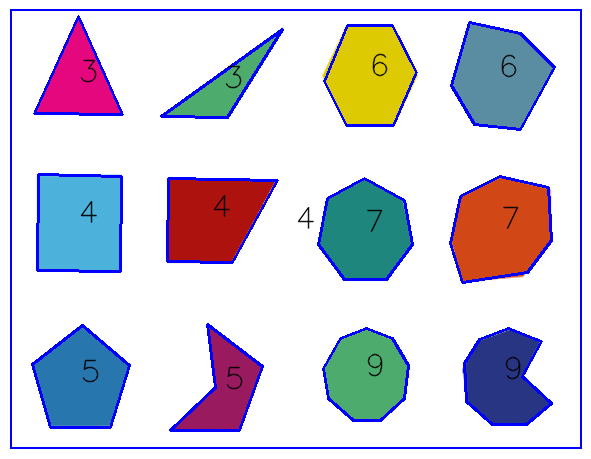

In [8]:
imagen = poligonos.copy()
gris = cv2.cvtColor(poligonos, cv2.COLOR_BGR2GRAY)
_, bn = cv2.threshold(gris, 200, 1, cv2.THRESH_BINARY)
contornos, jerarquía = cv2.findContours(bn, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contornos:
    poli = cv2.approxPolyDP(c, 5, True)
    if len(poli)>2: #Descartamos polígonos de menos de 3 lados
        cv2.polylines(imagen, [poli], True, color=(255,0,0), thickness=2)
        m = cv2.moments(poli)
        cx = int(m['m10']/m['m00'])
        cy = int(m['m01']/m['m00'])
        cv2.putText(imagen, str(len(poli)), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv2.LINE_AA)
cuia.plot(imagen)

Se puede comprobar que también ha sido identificado como un polígono el rectángulo blanco que constituye el fondo de la imagen. Para descartarlo se podría haber puesto un filtro para eliminar los polígonos cuyo área superase un umbral o también se podrían haber calculado los contornos en forma jerárquica para determinar qué polígonos contienen a otros. 